# Lending Club Case Study

Group- Chirag Chhillar, Suresh

Case Study Objective: To develop basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers

We have been provided with the Private Data of Lending Club. 
The complete loan data for all loans issued through the time period 2007 to 2011 and a data dictionary which describes the meaning of these variables.

In [1]:
#Importing all the required libraries for the analysis. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing loan csv
loan_df = pd.read_csv('loan.csv',encoding = "latin-1")

In [3]:
#finding shape of our df
loan_df.shape

(39717, 111)

In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#dropping columns with Nan
loan_df = loan_df.dropna(axis=1, how='all')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
#drop the columns with only single status
for col in loan_df.columns:
    if loan_df[col].nunique()==1:
        loan_df.drop(col,axis=1,inplace=True)

In [7]:
#delete all the columns with null value percentage more than 30%
for col in loan_df.columns:
    if(loan_df[col].isnull().sum()/len(loan_df)*100>30):
        del loan_df[col]

In [8]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [10]:
loan_df.shape

(39717, 44)

In [11]:
#dropping extra columns
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','url','zip_code', 'out_prncp', 'out_prncp_inv']
loan_df= loan_df.drop(columns_tobe_dropped,axis=1)

In [12]:
#columns related to employee behavior and that are not available at the time form filling
emp_behavior = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','total_pymnt_inv',
                'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
               'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan_df= loan_df.drop(emp_behavior,axis=1)

In [13]:
loan_df.shape

(39717, 24)

In [14]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [15]:
#dropping null values backruptcies
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [16]:
loan_df.shape

(39020, 24)

In [17]:
#dropping null values for other columns
loan_df=loan_df[~loan_df.emp_title.isnull()]
loan_df=loan_df[~loan_df.emp_length.isnull()]
loan_df=loan_df[~loan_df.title.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]

In [18]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,title,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,bike,GA,1.00,3,0,1687,9.40%,4,1008.71,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,personel,CA,20.00,10,0,5598,21%,37,12231.89,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,Personal,OR,17.94,15,0,27783,53.90%,38,3513.33,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,My wedding loan I promise to pay back,AZ,11.20,9,0,7963,28.30%,12,5632.21,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,Loan,NC,23.51,7,0,17726,85.60%,11,10110.84,0.0


In [19]:
loan_df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,title,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
39551,12375,36 months,10.91%,404.62,C,C3,Fullmoon Software,2 years,RENT,80000.0,...,no credit cards for me,VA,9.23,4,1,13126,96.50%,4,14370.922250,1.0
39562,4800,36 months,10.28%,155.52,C,C1,E.E. Wine Inc,1 year,RENT,35000.0,...,Want to pay off high intrest cards,VA,7.51,11,1,5836,68.70%,12,5134.085288,1.0
39623,9000,36 months,12.49%,301.04,D,D3,Maximus,8 years,MORTGAGE,39000.0,...,Pay off debt,MD,5.08,9,1,26233,62.90%,37,4015.960000,1.0
39666,15450,36 months,11.22%,507.46,C,C4,ARIN,2 years,MORTGAGE,40000.0,...,paying credit cards and doctor bill.,VA,13.50,13,1,6513,34.30%,29,11652.750000,1.0
39680,3000,36 months,11.86%,99.44,D,D1,Fairfield Manufacturing,2 years,MORTGAGE,36153.0,...,Merging 2 Accounts into one to save $$,IN,7.47,3,1,1064,70.90%,6,3579.662273,1.0


In [20]:
loan_df.total_pymnt.value_counts().tail()

5141.74754     1
1934.37000     1
9638.25426     1
5517.16000     1
10054.85449    1
Name: total_pymnt, dtype: int64

In [21]:
#limit to 2 decimals
loan_df.total_pymnt= round(loan_df.total_pymnt,2)

In [22]:
#converting date to correct format
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')

In [23]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,title,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,bike,GA,1.00,3,0,1687,9.40%,4,1008.71,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,personel,CA,20.00,10,0,5598,21%,37,12231.89,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,Personal,OR,17.94,15,0,27783,53.90%,38,3513.33,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,My wedding loan I promise to pay back,AZ,11.20,9,0,7963,28.30%,12,5632.21,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,Loan,NC,23.51,7,0,17726,85.60%,11,10110.84,0.0


In [24]:
#removing %
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%').astype('float')
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%').astype('float')

In [25]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36493 entries, 1 to 39680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36493 non-null  int64         
 1   term                  36493 non-null  object        
 2   int_rate              36493 non-null  float64       
 3   installment           36493 non-null  float64       
 4   grade                 36493 non-null  object        
 5   sub_grade             36493 non-null  object        
 6   emp_title             36493 non-null  object        
 7   emp_length            36493 non-null  object        
 8   home_ownership        36493 non-null  object        
 9   annual_inc            36493 non-null  float64       
 10  verification_status   36493 non-null  object        
 11  issue_d               36493 non-null  datetime64[ns]
 12  loan_status           36493 non-null  object        
 13  purpose         

In [26]:
#changing employee length to more meaningful value
emp_len = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan_df = loan_df.replace({"emp_length": emp_len })

In [27]:
loan_df.emp_length.value_counts()

10    8415
2     4184
0     4059
3     3921
4     3303
5     3138
1     3035
6     2122
7     1698
8     1408
9     1210
Name: emp_length, dtype: int64

In [28]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,title,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
1,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,bike,GA,1.00,3,0,1687,9.4,4,1008.71,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,personel,CA,20.00,10,0,5598,21.0,37,12231.89,0.0
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,Personal,OR,17.94,15,0,27783,53.9,38,3513.33,0.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,My wedding loan I promise to pay back,AZ,11.20,9,0,7963,28.3,12,5632.21,0.0
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,Loan,NC,23.51,7,0,17726,85.6,11,10110.84,0.0


In [29]:
#converting term
loan_df['term'] = loan_df.term.apply(lambda x: x.split()[0])

In [30]:
loan_df.shape

(36493, 24)

In [31]:
loan_df.loan_status.value_counts()

Fully Paid     30424
Charged Off     5003
Current         1066
Name: loan_status, dtype: int64

In [32]:
#removing current status loans
loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_df.shape

(35427, 24)

In [33]:
#adding another column wrt loan status
loan_df['loan_status_num'] = loan_df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

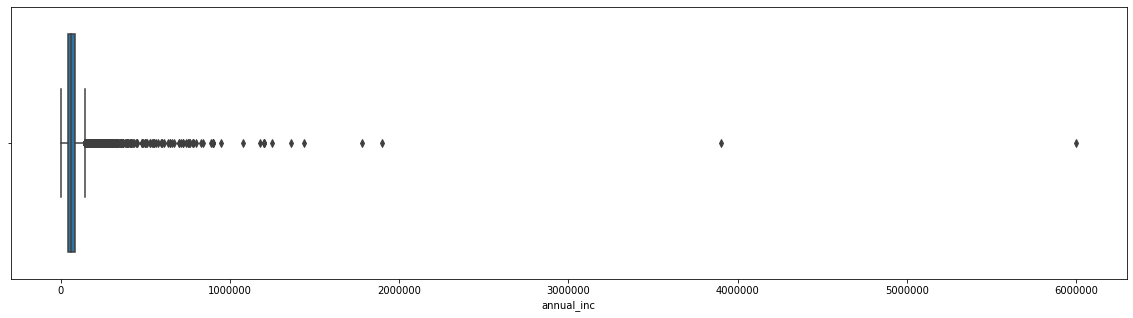

In [34]:
# box plot for annual income
plt.figure(figsize=(20, 5))
sns.boxplot(x=loan_df['annual_inc'], data=loan_df)
fig1 = plt.gcf()
fig1.savefig('annualincome_boxplot.png', dpi=100)

## Univariate and Segmented Univariate Analysis

In [35]:
#addinglabel to graphs
def addLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = 5
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            space *= -1
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) 
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',               
            va=va)                      

In [36]:
# plots a given column buckets against loan_status =Charged Off
def loanStatusPlot(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    addLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    fig1 = plt.gcf()
    fig1.savefig(by+'.png', dpi=100)
    return ax

In [37]:
# plots a given column buckets against loan_status =Fully Paid
def loanStatusFullyPaidPlot(dataframe, by, loanstatus='Fully Paid'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    addLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    fig1 = plt.gcf()
    fig1.savefig(by+'full.png', dpi=100)
    return ax

In [38]:
# plots a distribution of target column, and its boxplot against loan_status column
def distributionPlot(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    fig1 = plt.gcf()
    fig1.savefig(col+'.png', dpi=100)
    plt.show()

In [39]:
# two plots side by side 
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (loan_df[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    addLabels(ax)
    plt.subplot(1, 2, 2)
    values = (loan_df.loc[loan_df['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    addLabels(ax)
    fig1 = plt.gcf()
    fig1.savefig(by+'.png', dpi=100)

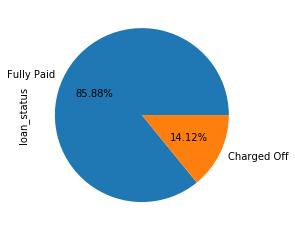

In [40]:
#Pie chart of loan status
loan_df['loan_status'].value_counts().plot.pie(autopct='%1.2f%%')
fig1 = plt.gcf()
fig1.savefig('loan_status_percentage.png', dpi=100)
plt.show()

Nearly 14% of loans in the dataset are DEFAULT. 

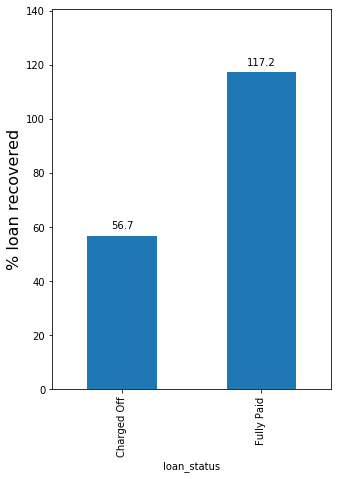

In [41]:
#loan recovered %
plt.figure(figsize=(5,7))
ax = (loan_df.groupby('loan_status').total_pymnt.sum() * 100 / loan_df.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
fig1 = plt.gcf()
fig1.savefig('loan_recovered.png', dpi=100)
addLabels(ax)

Lending Club only recovers nearly 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes nearly 18% profit.

Text(0.5, 1.0, 'Amount applied by the Borrower')

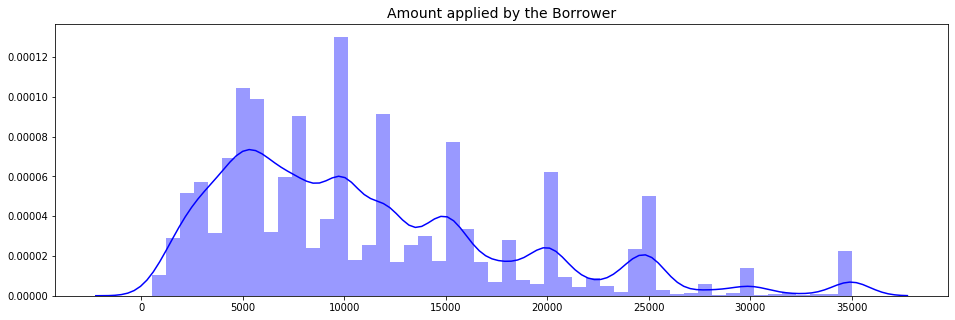

In [42]:
#loan borrowed
fig, ax = plt.subplots(1, 1, figsize=(16,5))

loan_amount = loan_df["loan_amnt"].values

sns.distplot(loan_amount, ax=ax, color="blue")
ax.set_title("Amount applied by the Borrower", fontsize=14)

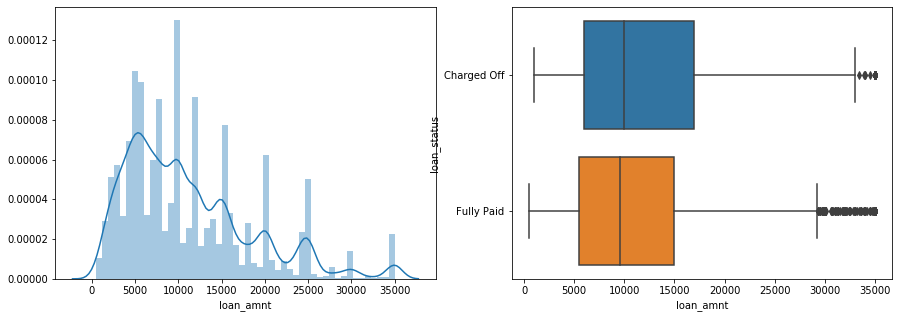

In [43]:
#two plots of loan amount
distributionPlot(loan_df, 'loan_amnt')

In [44]:
#Create Derived categorical variable
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

In [45]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,loan_status_num,loan_amnt_bin
1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,1.00,3,0,1687,9.4,4,1008.71,0.0,1,0-5k
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,20.00,10,0,5598,21.0,37,12231.89,0.0,0,5-10k
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,11.20,9,0,7963,28.3,12,5632.21,0.0,0,0-5k
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,23.51,7,0,17726,85.6,11,10110.84,0.0,0,5-10k
7,3000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,...,5.35,4,0,8221,87.5,4,3939.14,0.0,0,0-5k


In [46]:
loan_df.shape

(35427, 26)

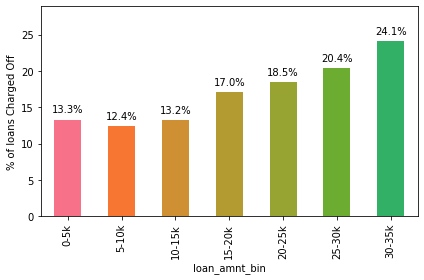

In [47]:
#plot for loan amount bin
loanStatusPlot(loan_df, 'loan_amnt_bin')

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

## Other variables

In [48]:
#function for multiple plots
def categoricalPlotsBar(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        addLabels(ax)
        fig1 = plt.gcf()
    fig1.savefig('allcategories.png', dpi=100)

    plt.tight_layout()

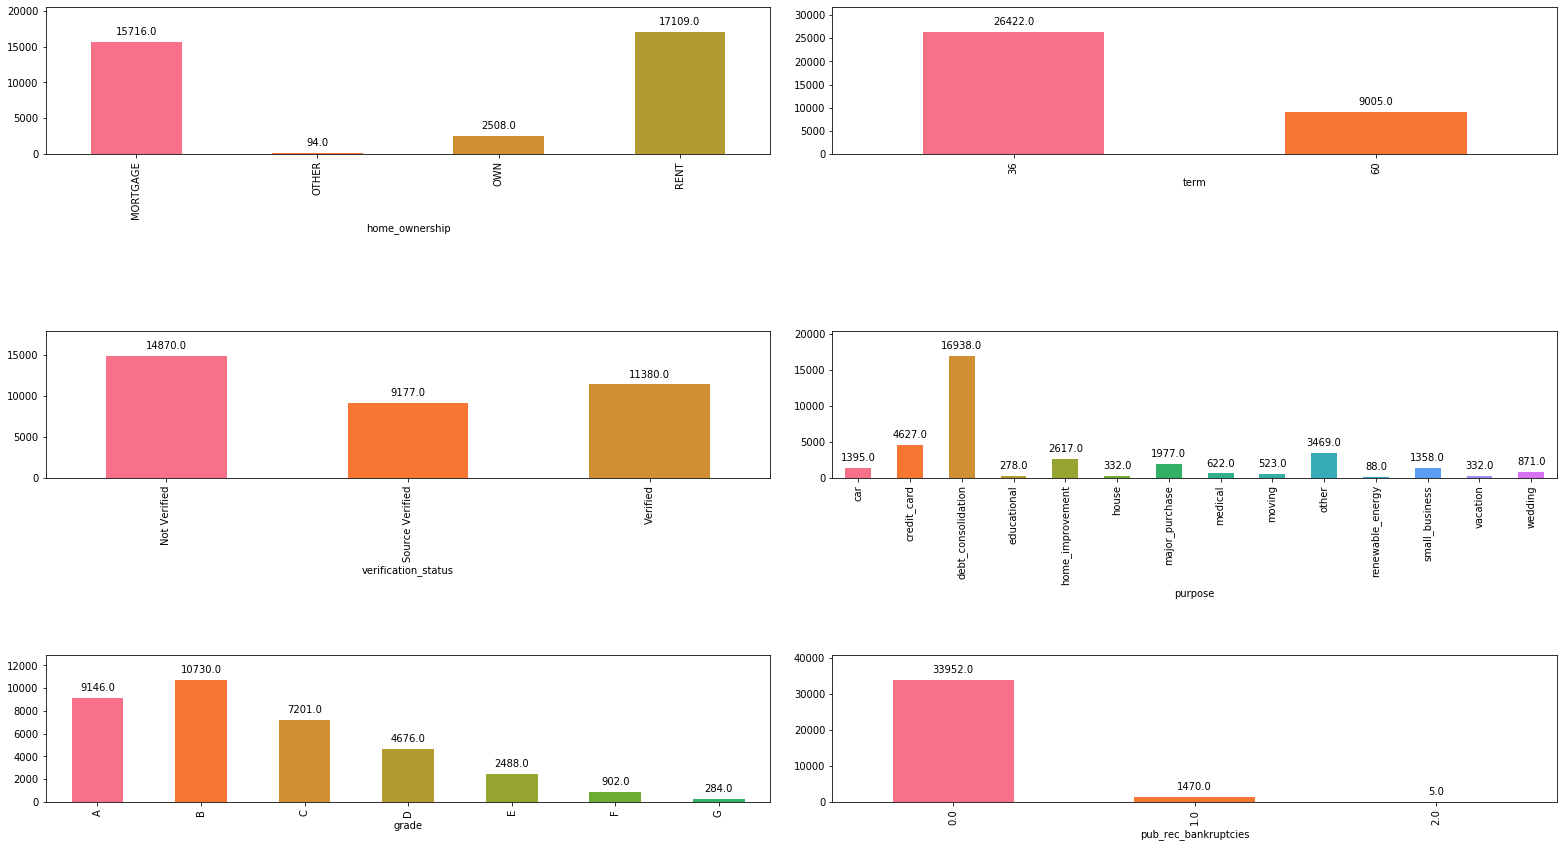

In [49]:
#plot for required columns
plt.figure(figsize=(22,12))

categoricalPlotsBar(loan_df, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Obervation**
* Most loans are for 36 month term 
* Very few loans are extended to people with prior record of bankruptcy
* debt_consolidation is by far the largest 'purpose' for seeking a loan 
* Most approved loans are high grade
* Investigate the **frequencies of defaults** by term, purpose and prior record of bankruptcy 

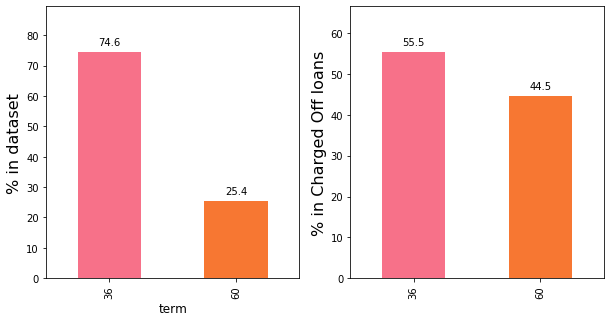

In [50]:
#double plot for term
plt.figure(figsize=(10,5))
plot_percentages(loan_df, 'term')

Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
Among Charged Off loans, percentage of term 60 months rises to 45%. 

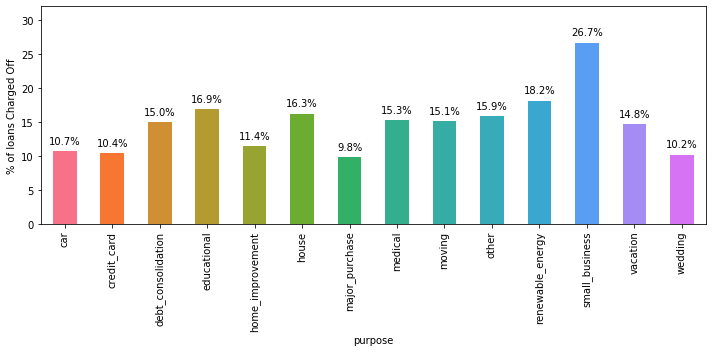

In [51]:
#plot for purpose
plt.figure(figsize=(10, 5))
loanStatusPlot(loan_df, 'purpose')

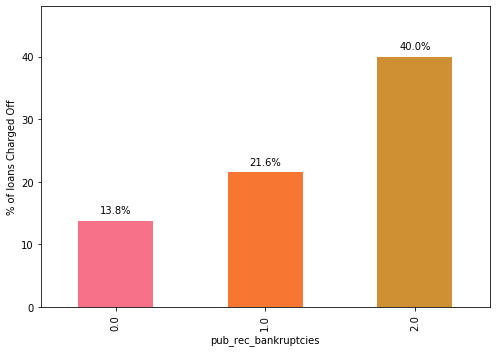

In [52]:
#plot for bankruptcies
plt.figure(figsize=(7,5))
loanStatusPlot(loan_df, 'pub_rec_bankruptcies')

charged off is higher with higher interest

In [53]:
#interest rate
loan_df.int_rate.describe()

count    35427.000000
mean        11.986776
std          3.702690
min          5.420000
25%          8.940000
50%         11.860000
75%         14.500000
max         24.400000
Name: int_rate, dtype: float64

In [54]:
#rounding for interest rates
loan_df['interest_rate_buckets'] = round(loan_df['int_rate'])

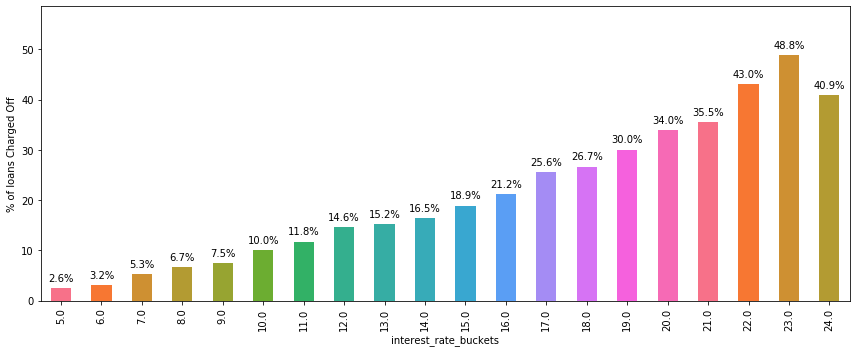

In [55]:
plt.figure(figsize=(12,5))
loanStatusPlot(loan_df, 'interest_rate_buckets')

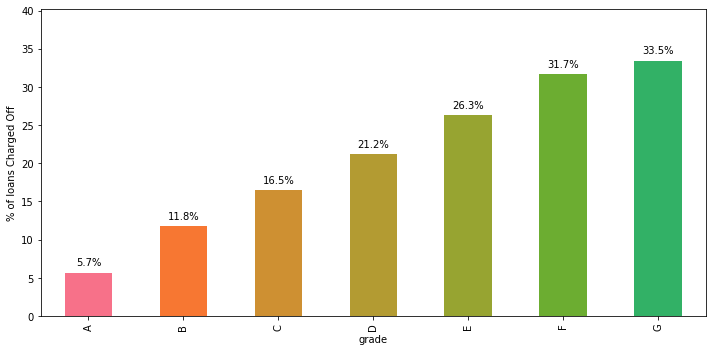

In [56]:
plt.figure(figsize=(10,5))
loanStatusPlot(loan_df, 'grade')

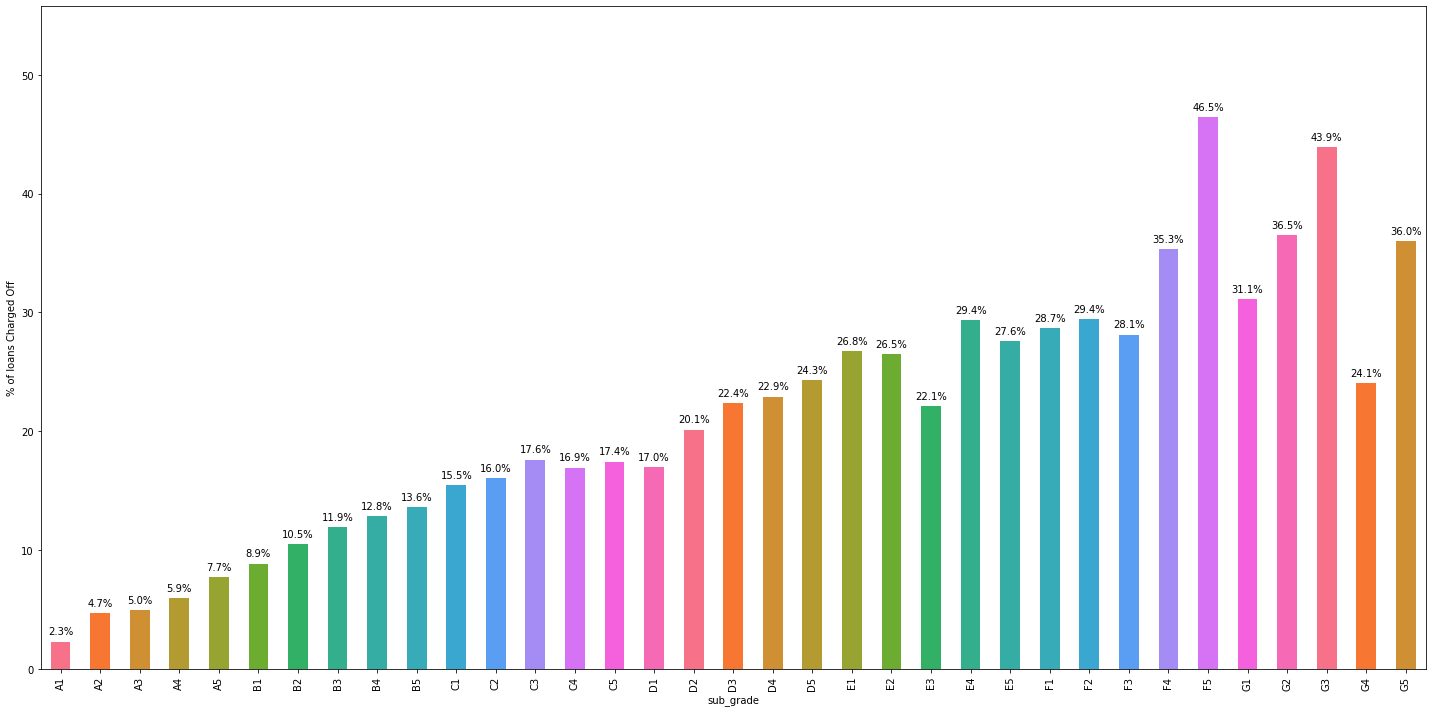

In [57]:
plt.figure(figsize=(20,10))
loanStatusPlot(loan_df, 'sub_grade')

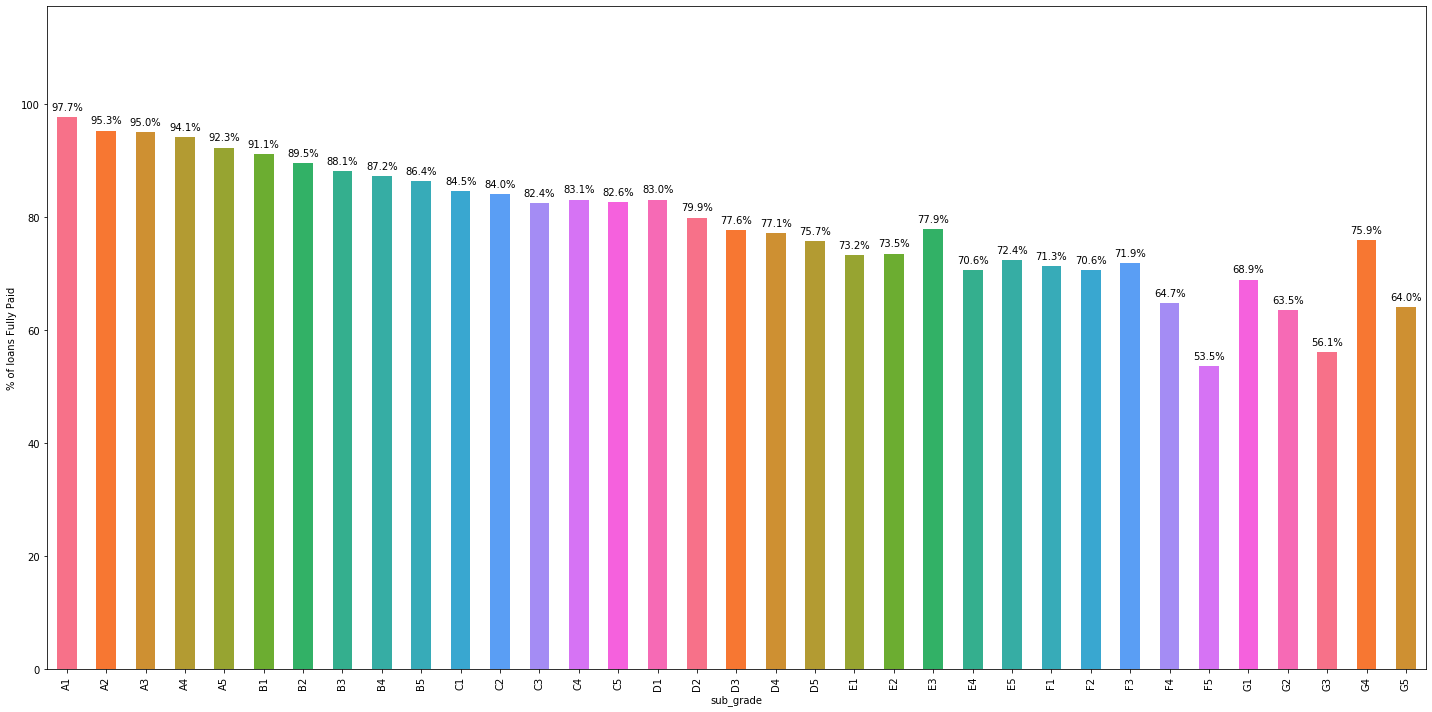

In [58]:
plt.figure(figsize=(20,10))
loanStatusFullyPaidPlot(loan_df, 'sub_grade')

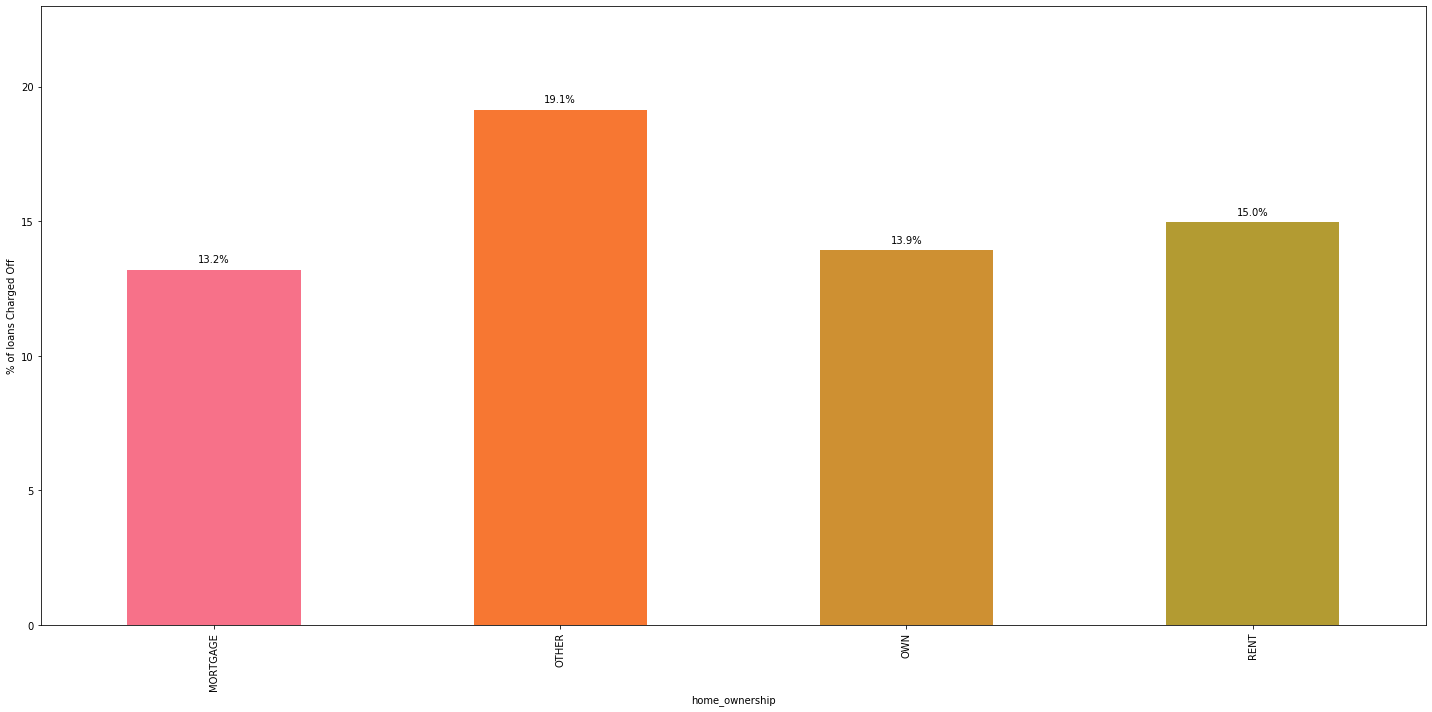

In [59]:
plt.figure(figsize=(20,10))
loanStatusPlot(loan_df, 'home_ownership')

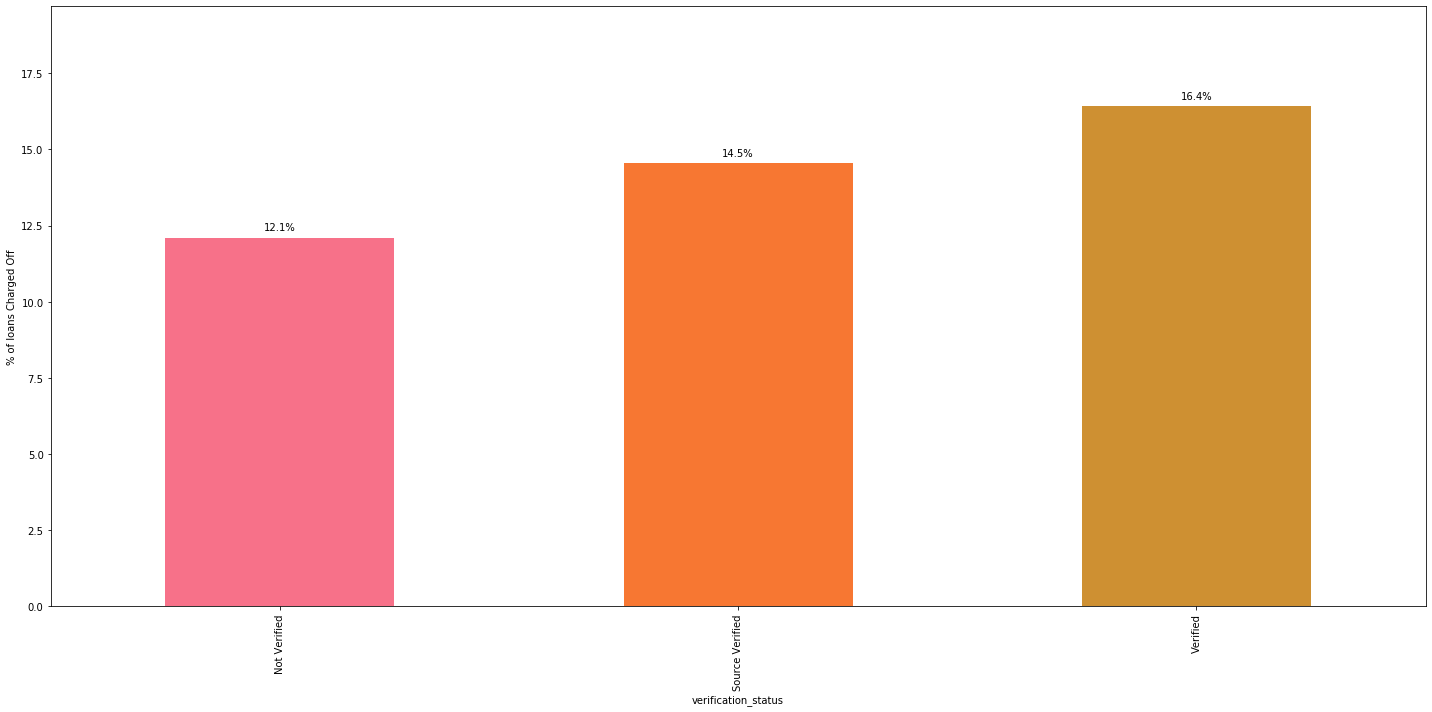

In [60]:
plt.figure(figsize=(20,10))
loanStatusPlot(loan_df, 'verification_status')

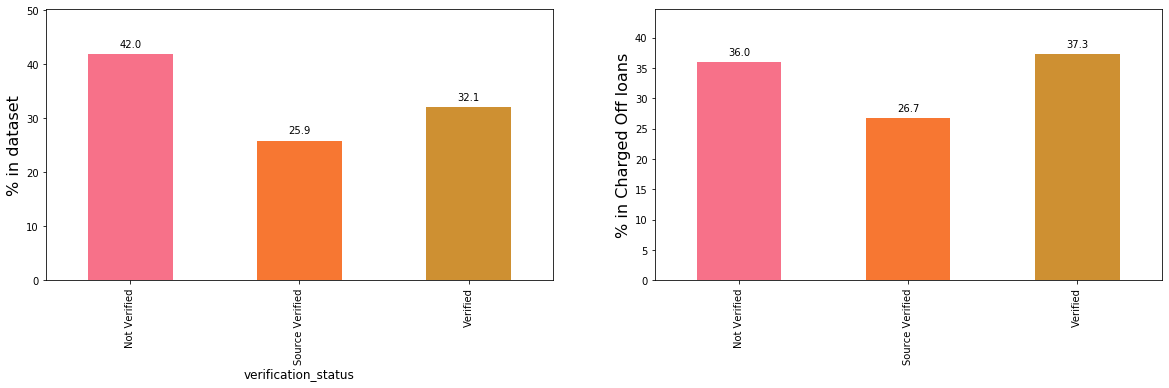

In [61]:
plt.figure(figsize=(20,5))
plot_percentages(loan_df, 'verification_status', True)

In [62]:
#fetching month and year from issue_d columns
loan_df['issue_d_month'] = loan_df['issue_d'].dt.month
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year

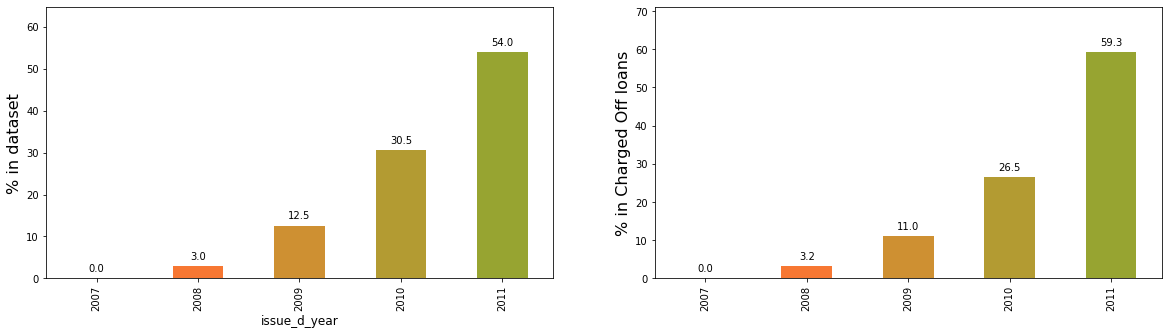

In [63]:
plt.figure(figsize=(20,5))
plot_percentages(loan_df, 'issue_d_year', True)

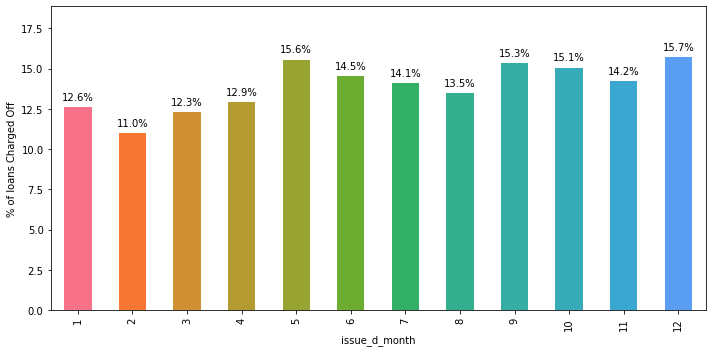

In [64]:
plt.figure(figsize=(10, 5))
loanStatusPlot(loan_df, 'issue_d_month')

In [65]:
loan_df.addr_state.value_counts(normalize=True).head(10)

CA    0.180992
NY    0.095803
FL    0.071640
TX    0.069467
NJ    0.047139
IL    0.039010
PA    0.038784
VA    0.035651
GA    0.035425
MA    0.033336
Name: addr_state, dtype: float64

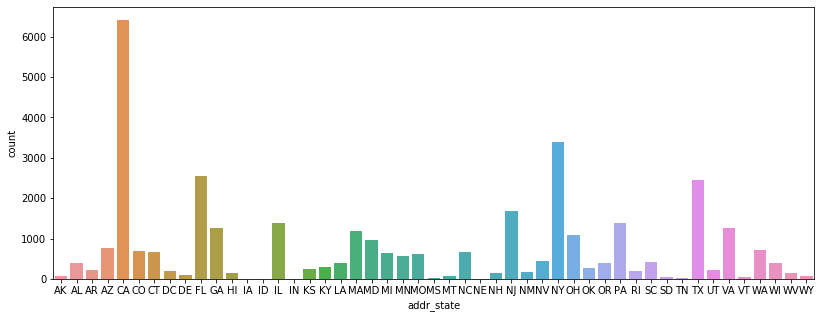

In [66]:
#count plot for addr_state column
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(loan_df['addr_state'], order=sorted(loan_df.addr_state.unique()))
fig1 = plt.gcf()
fig1.savefig('addrstate.png', dpi=100)
plt.show()

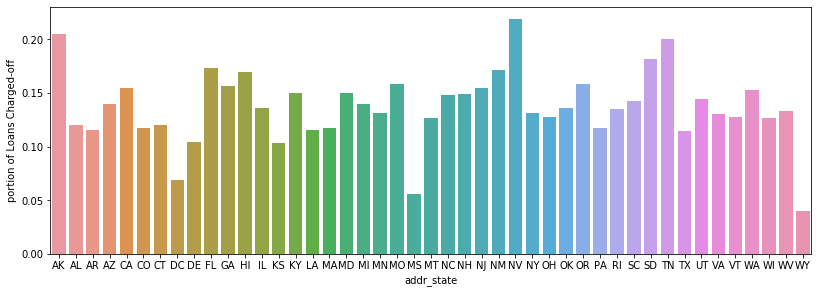

In [67]:
#Fraction of loans charged off 
charge_off_count = loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'] 

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
fig1 = plt.gcf()
fig1.savefig('state_chargedoff.png', dpi=100)
plt.show()

In [68]:
#dti analysis
loan_df.dti.describe()

count    35427.000000
mean        13.402182
std          6.636947
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

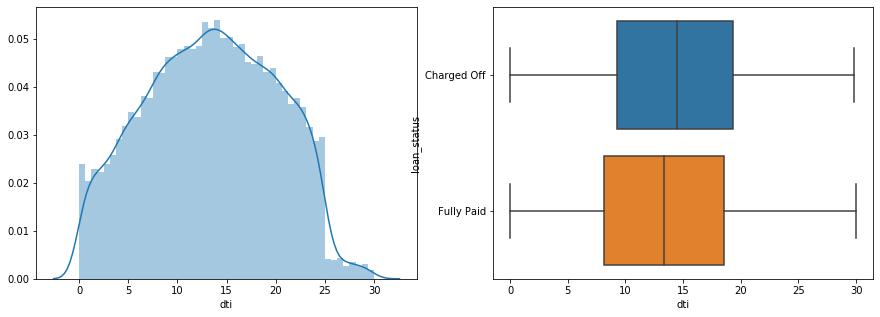

In [69]:
#two plot for dti
plt.figure(figsize=(10,5))

distributionPlot(loan_df, 'dti')

In [70]:
loan_df.revol_util.describe()

count    35427.000000
mean        49.140047
std         28.227621
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

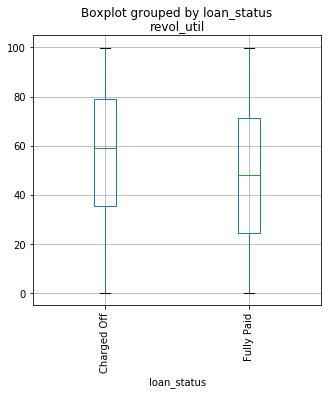

In [71]:
#boxplot for revol loan status
fig, ax = plt.subplots(figsize=(5,5))
loan_df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)
fig1 = plt.gcf()
fig1.savefig('revolutil_loanstatus.png', dpi=100)

In [72]:
loan_df['revol_util_bin'] = round(loan_df['revol_util']/5)

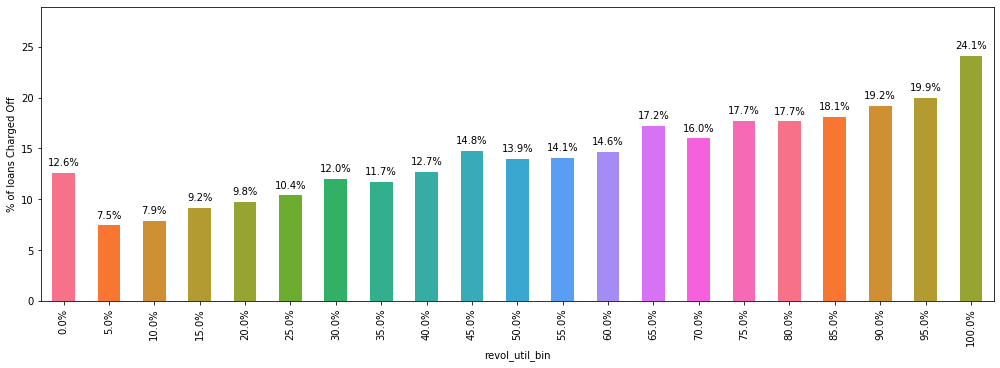

In [73]:
plt.figure(figsize=(14,5))
ax = loanStatusPlot(loan_df, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

#### Derived variable - ratio of loan amount to annual income 

In [74]:
loan_df['ratio'] = loan_df['loan_amnt'] * 10 / loan_df['annual_inc']

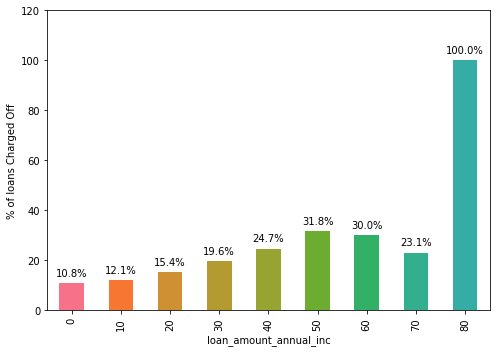

In [75]:
loan_df['loan_amount_annual_inc'] = (loan_df['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
loanStatusPlot(loan_df, 'loan_amount_annual_inc')

## Bivariate Analysis

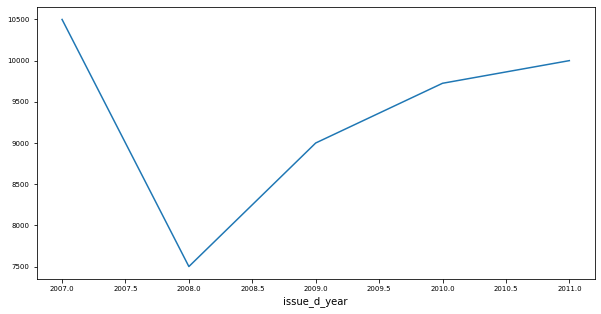

In [76]:
#line graph for iessue year for median
plt.figure(figsize=(10,5))
loan_df.groupby('issue_d_year').loan_amnt.median().plot(kind='line', fontsize=7)
fig1 = plt.gcf()
fig1.savefig('issue_year_median_loanamount.png', dpi=100)
plt.show()

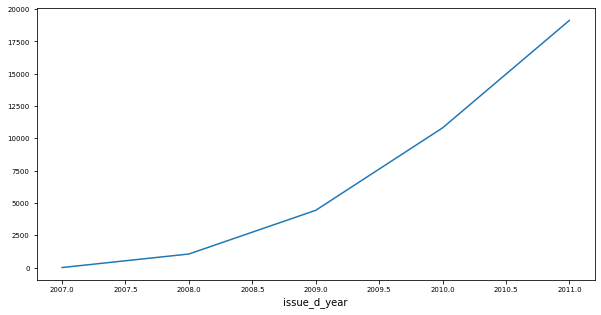

In [77]:
# line graph for issue year
plt.figure(figsize=(10,5))
loan_df.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
fig1 = plt.gcf()
fig1.savefig('issue_year_count_loanamount.png', dpi=100)
plt.show()

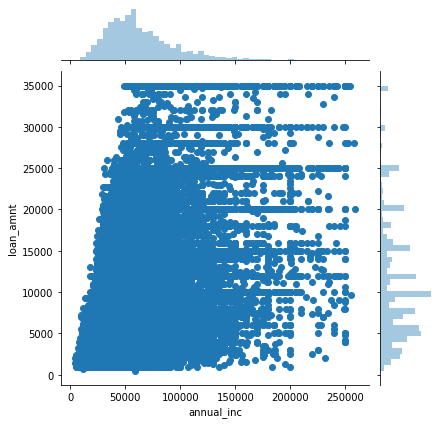

In [78]:
sns.jointplot('annual_inc', 'loan_amnt', loan_df.loc[loan_df['annual_inc']<260000])
fig1 = plt.gcf()
fig1.savefig('annualinc_loan_amount.png', dpi=100)
plt.show()

- Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

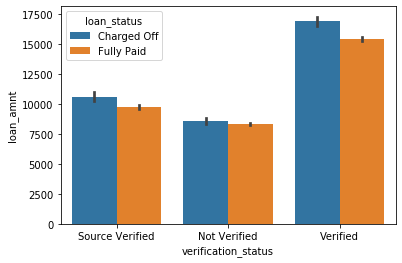

In [79]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)
fig1 = plt.gcf()
fig1.savefig('verifi_statue_loan_amt.png', dpi=100)

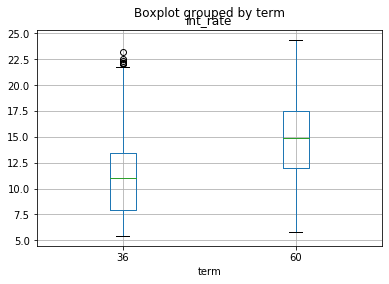

In [80]:
loan_df.boxplot(column='int_rate', by='term')
fig1 = plt.gcf()
fig1.savefig('int_rate_term.png', dpi=100)
plt.show()

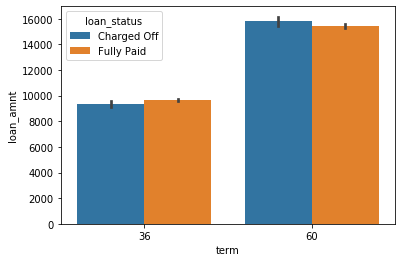

In [81]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)
fig1 = plt.gcf()
fig1.savefig('term_loan_amnt_status.png', dpi=100)
plt.show()

In [82]:
corr=loan_df.corr()
corr['loan_amnt']

loan_amnt                 1.000000
int_rate                  0.299558
installment               0.930830
emp_length                0.145059
annual_inc                0.259227
dti                       0.062923
open_acc                  0.174804
pub_rec                  -0.047321
revol_bal                 0.319893
revol_util                0.066605
total_acc                 0.256177
total_pymnt               0.882869
pub_rec_bankruptcies     -0.030850
loan_status_num           0.061665
interest_rate_buckets     0.299552
issue_d_month             0.051251
issue_d_year              0.115780
revol_util_bin            0.066247
ratio                     0.616845
loan_amount_annual_inc    0.596836
Name: loan_amnt, dtype: float64

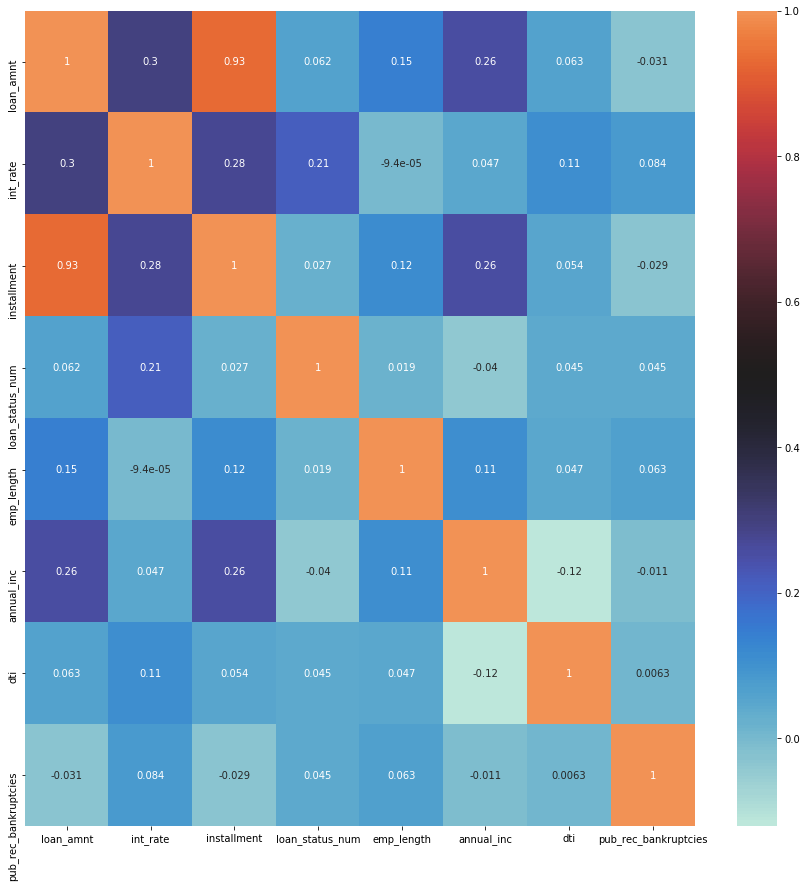

In [83]:
#correlation between select columns
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment', 'loan_status_num',
       'emp_length', 'annual_inc',
       'dti', 
       'pub_rec_bankruptcies']
corr = loan_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
fig1 = plt.gcf()
fig1.savefig('corr.png', dpi=100)

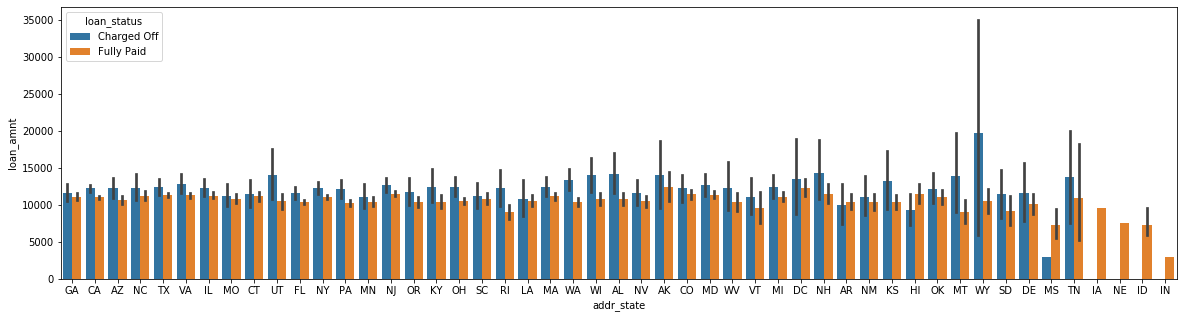

In [84]:
#bar plot for addrstate, loan amount and loan status
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan_df, estimator=np.mean)
fig1 = plt.gcf()
fig1.savefig('addrstate_loan_amount_status.png', dpi=100)
plt.show()

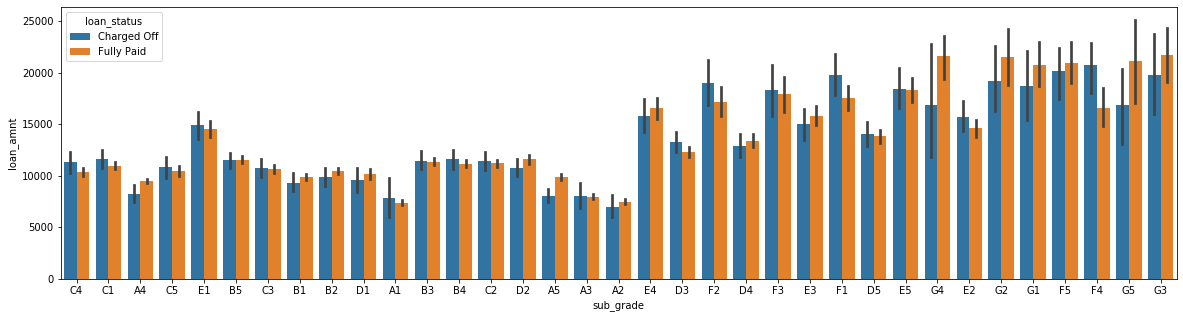

In [85]:
#bar plot for addrstate, loan amount and loan status
plt.figure(figsize=(20,5))
sns.barplot(x='sub_grade', y='loan_amnt', hue='loan_status',data=loan_df, estimator=np.mean)
fig1 = plt.gcf()
fig1.savefig('subgrade_loan_amount_status.png', dpi=100)
plt.show()

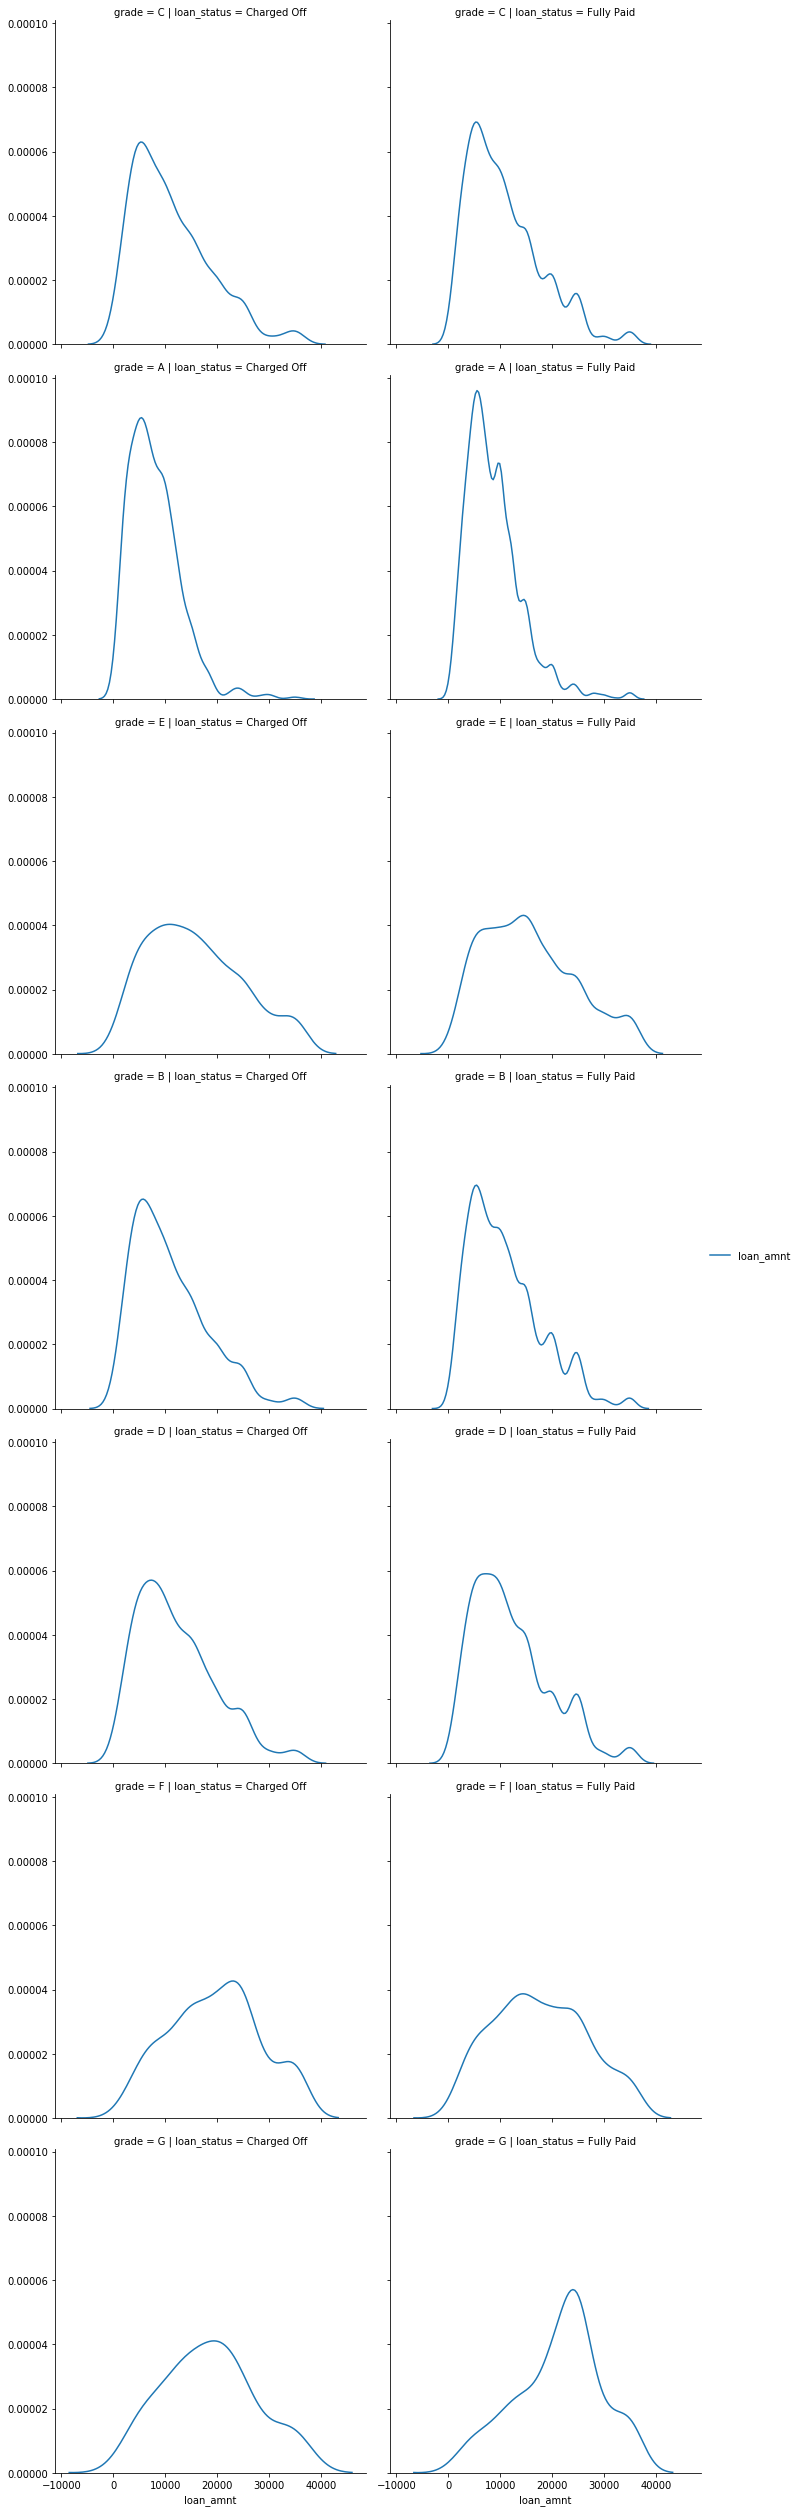

In [86]:
g=sns.FacetGrid(loan_df, row="grade",col='loan_status',size=5)
g.map(sns.kdeplot,'loan_amnt').add_legend()
fig1 = plt.gcf()
fig1.savefig('multi_line_plots.png', dpi=100)
plt.show()

In [87]:
def create_binsQcut(df,colName, Ordinal3):
    nOrdinals=len(Ordinal3)
    global loan_df
    #stat_df = stat_df.append(data, ignore_index=True)
    newName=colName+'_bin'
    print('New Column created with NAME: ',newName)
    #print(minVal,maxVal,freq)
    loan_df[newName]=pd.qcut(df[colName], q=[0, .25, .75, 1], labels=Ordinal3)
    print(pd.cut(df[colName], nOrdinals, labels=Ordinal3).unique())

In [88]:
#Bin the continuous data into bins
create_binsQcut(loan_df,'annual_inc',['low', 'medium', 'high'])

New Column created with NAME:  annual_inc_bin
[low, medium, high]
Categories (3, object): [low < medium < high]


In [89]:
#Bin the continuous data into bins
create_binsQcut(loan_df,'int_rate',['low', 'medium', 'high'])

New Column created with NAME:  int_rate_bin
[medium, low, high]
Categories (3, object): [low < medium < high]


In [90]:
#changing employee length to more meaningful value
loan_stat = {
    'Charged Off' : 0,
    'Fully Paid' : 1,
}
loan_df = loan_df.replace({"loan_status": loan_stat })

In [91]:
df_imp=loan_df[['loan_status','term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose',
                'loan_amnt_bin','annual_inc_bin','int_rate_bin']]

In [92]:
#drop the columns with only single status
imp_param=[]
dict={}
for col in df_imp.columns:
    if col!='loan_status':
        values = df_imp['loan_status'].groupby(df_imp[col]).mean()
        dict[col] = values.max()-values.min()

sort_dict = sorted(dict.items(), key=lambda x: x[1], reverse=True)
print('Top 5 important factors are:')
for i in sort_dict:
	print(i[0], '  :',round(i[1],2))

Top 5 important factors are:
sub_grade   : 0.44
grade   : 0.28
int_rate_bin   : 0.19
purpose   : 0.17
term   : 0.14
loan_amnt_bin   : 0.12
annual_inc_bin   : 0.07
home_ownership   : 0.06
verification_status   : 0.04
emp_length   : 0.03


## End of file.